# Capstone Project - Cars Accident Severity 
### Applied Data Science Capstone by IBM/Coursera


## Data <a name="data"></a>


For this project, the Dataset was shared on Coursera as a csv file available by Clicking here. 
The data is composed of 37 features that accurately describe each car accident that happened in Seattle from 2014 to 2020. They are classified in terms of severity, type of weather and road condition, location, address type, and many more. However, for this case study, not all attributes are useful as the main objective is to predict an accident's probability and severity. Therefore, the Dataset needs deep understanding and analysis before choosing the right attributes to reach our goal. After selecting the appropriate features, the new Dataset is balanced and preprocessed before feeding it to a supervised machine learning model that will learn to predict in the future the probability of a car accident based on the chosen attributes, in the most accurate way.

To consider the problem we can list the data as below:

•	After visualizing and comparing the effect and weight of many attributes on the severity of an accident, the main attributes that will be used are the following: 

o	‘WEATHER’: A description of the weather conditions during the time of the collision. 

o	‘ROADCOND’: The condition of the road during the collision. 

o	‘LIGHTCOND’: The light conditions during the collision. 

o	‘LOCATION’: The location of the accident.

o	‘SEVERITYCODE’: Representing the severity of each accident

•	After getting the number of labels for each type, we can clearly see that the data is unbalanced as there is a lot more of accidents of type 1 than 2. To balance the data we may either down sample the number of type 1 or duplicate cases of type 2 to get equal values of each label. Balancing the labels prevent to create a bias machine learning model.

•	We also have to check if there is any missing data in any of our features column and replace them or either delete the corresponding row (in case of low number of Nan)

•	Moreover, most of the features have categorical values that need to be transformed to numerical values in order to improve the predictability of our model.

•	Finally, we will be using several types of supervised learning models and compare their performance to choose the best classifier for this project.











## Methodology

Let's start by importing the software libraries that we are going to use in this notebook:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

Let's take a look at our dataset:

In [2]:
file_name = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df_acc = pd.read_csv(file_name)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_acc.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_acc.shape

(194673, 38)

In [5]:
df_acc.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
roaddf = pd.get_dummies(df_acc['ROADCOND'])
roaddf = pd.DataFrame(columns = ['Number of crashes'], data = roaddf.sum())
roaddf['Percentage %'] = round((roaddf/(114104)*100),2)
roaddf.sort_values(['Percentage %'], ascending=False, axis=0, inplace=True)
roaddf

,Number of crashes,Percentage %
Dry,124510,109.12
Wet,47474,41.61
Unknown,15078,13.21
Ice,1209,1.06
Snow/Slush,1004,0.88
Other,132,0.12
Standing Water,115,0.10
Sand/Mud/Dirt,75,0.07
Oil,64,0.06


##### The following map will be available in the report as well as in the presentation:

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: / 

In [7]:
location=df_acc.groupby(['Y','X','LOCATION','SEVERITYCODE']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>=1]
location['color']=location['SEVERITYCODE'].apply(lambda SEVERITYCODE:"red" if SEVERITYCODE == 2 else
                                         "Blue")
location['size']=location['count'].apply(lambda count:10 if count>=250 else
                                         8 if count>=150 and count<250 else
                                         6 if count>=50 and count<150 else
                                         None)
location.head()

,Y,X,LOCATION,SEVERITYCODE,count,color,size
32746,47.708655,-122.332653,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,1,171,Blue,8.0
34080,47.725036,-122.344997,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,1,151,Blue,8.0
13214,47.604161,-122.328079,6TH AVE AND JAMES ST,1,145,Blue,6.0
15044,47.612991,-122.345863,1ST AVE BETWEEN BLANCHARD ST AND BELL ST,1,140,Blue,6.0
10127,47.579673,-122.299160,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,1,137,Blue,6.0


In [ ]:
seattle_map=folium.Map([47.6062, -122.3321],zoom_start=12)

for lat,lon,area,color,count,size in zip(location['Y'],location['X'],location['LOCATION'],location['color'],location['count'],location['size']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(seattle_map)
seattle_map.save('seattlemap.html')


In [8]:
f = df_acc.loc[:,['PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
f['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

In [8]:
locationn=df_acc.groupby(['Y','X','LOCATION','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SEVERITYCODE']).size().reset_index(name='count').sort_values(by='count',ascending=False)
locationn=locationn[locationn['count']>=1]
locationn['icon']=locationn['PEDCYLCOUNT'].apply(lambda x: 'bicycle' if x!=0 else
                                         'car-crash')
locationn['color']=locationn['SEVERITYCODE'].apply(lambda SEVERITYCODE:"red" if SEVERITYCODE == 2 else
                                         "Blue")
locationn.head()

,Y,X,LOCATION,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SEVERITYCODE,count,icon,color
56743,47.708655,-122.332653,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,0,0,2,1,151,car-crash,Blue
22574,47.604161,-122.328079,6TH AVE AND JAMES ST,0,0,2,1,129,car-crash,Blue
26607,47.612991,-122.345863,1ST AVE BETWEEN BLANCHARD ST AND BELL ST,0,0,2,1,126,car-crash,Blue
59041,47.725036,-122.344997,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,0,0,2,1,122,car-crash,Blue
16753,47.579673,-122.299160,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,0,0,2,1,119,car-crash,Blue


In [ ]:
seattle2_map=folium.Map([47.6062, -122.3321],zoom_start=12)

for lat,lon,area,color,count,icon in zip(locationn['Y'],locationn['X'],locationn['LOCATION'],locationn['color'],locationn['count'],locationn['icon']):
     folium.Marker([lat, lon],
                            popup= area,
                            icon=folium.Icon(icon=icon, color=color),).add_to(seattle2_map)
seattle2_map

#### Relationship between car accident severity and the day of the week

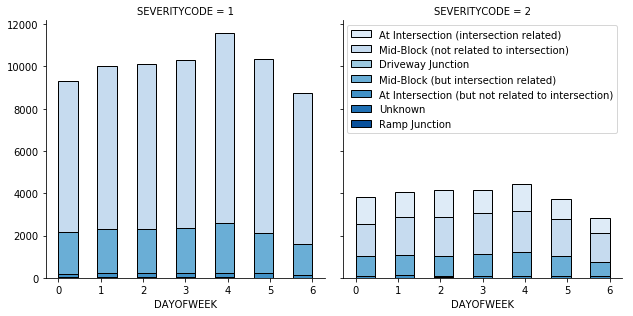

In [14]:
df_acc['INCDATE']= pd.to_datetime(df_acc['INCDATE'])
df_acc['DAYOFWEEK'] = df_acc['INCDATE'].dt.dayofweek
bins = np.linspace(df_acc.DAYOFWEEK.min(), df_acc.DAYOFWEEK.max(), 14)
g = sns.FacetGrid(df_acc, col='SEVERITYCODE', hue = 'JUNCTIONTYPE', palette="Blues", col_wrap=4,height=4.5, aspect=0.95)
g.map(plt.hist, 'DAYOFWEEK', bins=bins, ec="k")
g.axes[-1].legend(loc = 'upper right')
plt.show()

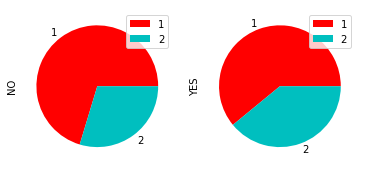

In [9]:
df_acc['COUNT']=1
df_acc['UNDERINFL'] = df_acc['UNDERINFL'].apply(lambda x: 'NO' if (x=='0')|(x=='N') else 'YES' if  (x=='1')|(x=='Y') else x)
UNDERINFL = df_acc.groupby(['UNDERINFL','SEVERITYCODE']).sum()['COUNT']
UNDERINFL.unstack().transpose().plot.pie(subplots = True, colors = ['r','c'])
plt.show()

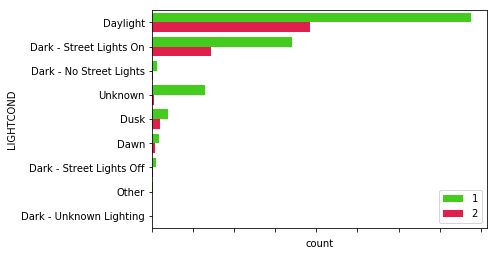

In [10]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_acc, palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

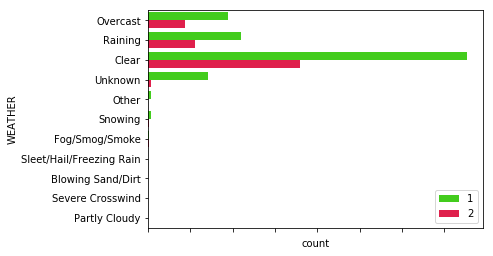

In [11]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_acc, palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

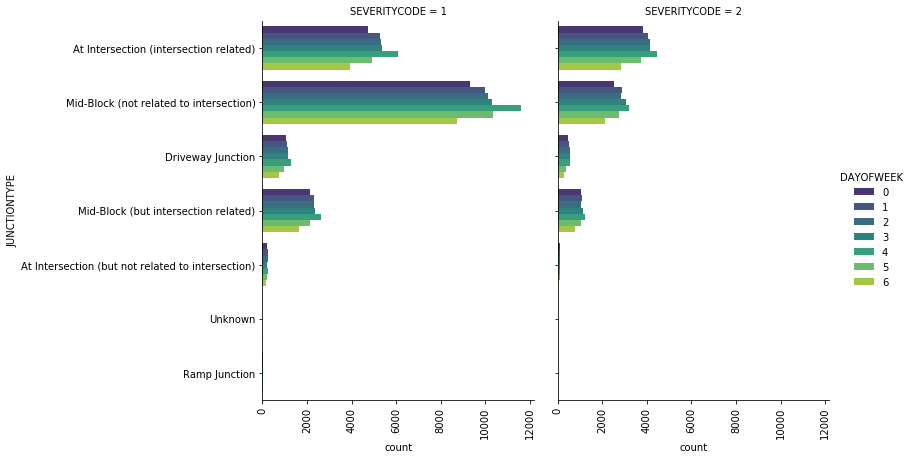

In [21]:
ax = sns.catplot(y="JUNCTIONTYPE", col="SEVERITYCODE", hue='DAYOFWEEK',
              data=df_acc, kind="count",
              height=6, aspect=1,palette='viridis')
ax.set_xticklabels( rotation=90)

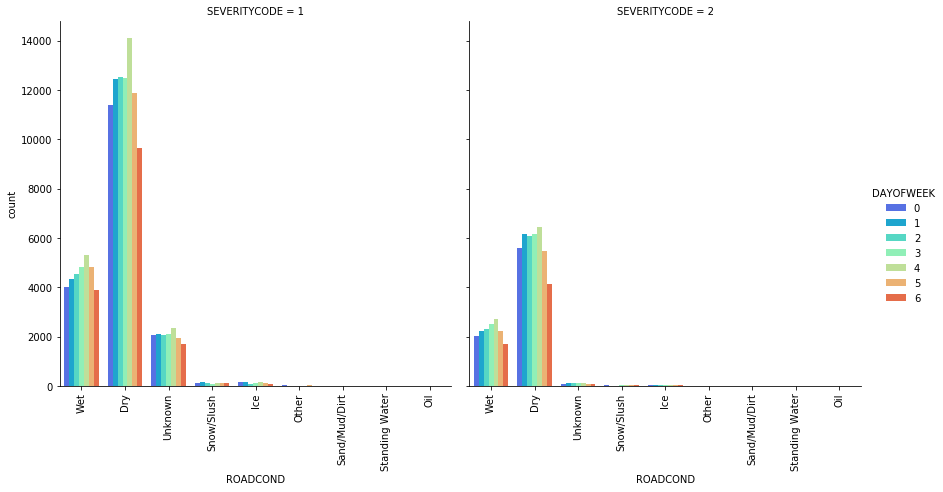

In [16]:
ax = sns.catplot(x="ROADCOND", col="SEVERITYCODE", hue='DAYOFWEEK',
              data=df_acc, kind="count",
              height=6, aspect=1,palette='rainbow')
ax.set_xticklabels( rotation=90)

## Data Processing 

In [22]:
null_columns=df_acc.columns[df_acc.isnull().any()]
print('Number of null value for each attribute:')
df_acc[null_columns].isnull().sum()

Number of null value for each attribute:


X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64

In [23]:
print('Types of severity code:\n',df_acc['SEVERITYCODE'].value_counts())
print('\nAs we can see the data is unbalanced and we need to equalize the two types of severity')

Types of severity code:
 1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

As we can see the data is unbalanced and we need to equalize the two types of severity


In [24]:
df_acc = df_acc.loc[:,["ROADCOND","LIGHTCOND",'WEATHER','DAYOFWEEK','UNDERINFL','JUNCTIONTYPE','SEVERITYCODE']]
df_acc.isnull().sum()

ROADCOND        5012
LIGHTCOND       5170
WEATHER         5081
DAYOFWEEK          0
UNDERINFL       4884
JUNCTIONTYPE    6329
SEVERITYCODE       0
dtype: int64

In [25]:
print('The number of null value (to drop) in each type of accident:')
print(df_acc[df_acc.isna().any(axis=1)]['SEVERITYCODE'].value_counts())

The number of null value (to drop) in each type of accident:
1    9958
2    1519
Name: SEVERITYCODE, dtype: int64


In [26]:
df_acc = df_acc.dropna()
df_acc['SEVERITYCODE'].value_counts()

1    126527
2     56669
Name: SEVERITYCODE, dtype: int64

In [27]:
df_acc['UNDERINFL'] = df_acc['UNDERINFL'].apply(lambda x: '1' if x=='YES' else '0' )

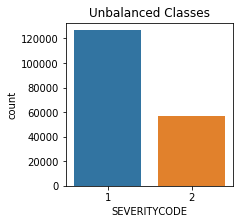

In [60]:
plt.figure(figsize=(3, 3))
sns.countplot(x='SEVERITYCODE', data=df_acc)
plt.title('Unbalanced Classes')
plt.show()

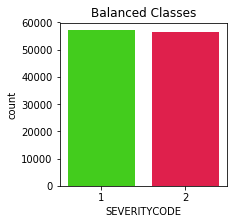

In [59]:
shuffled_df = df_acc.sample(frac=1,random_state=4)
fraud_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 2]
non_fraud_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 1].sample(n=57052,random_state=42)
normalized_df  = pd.concat([fraud_df, non_fraud_df])
plt.figure(figsize=(3, 3))
sns.countplot(x='SEVERITYCODE', data=normalized_df, palette='prism')
plt.title('Balanced Classes')
plt.show()

In [29]:
def one_hot_code(df, columns):
    for col in columns:
        dummy = pd.get_dummies(df[col], prefix=col)
        if col+"_Unknown" in dummy.columns:
            dummy.drop(columns=[col+"_Unknown"], inplace=True)
        elif col+"_Others" in dummy.columns:
            dummy.drop(columns=[col+"_Other"], inplace=True)
        else:
            dummy.drop(columns=[dummy.columns[-1]], inplace=True)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)  
    return df

hotcoding = ['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','DAYOFWEEK']
data = one_hot_code(normalized_df, hotcoding)
data.columns

Index(['UNDERINFL', 'SEVERITYCODE', 'WEATHER_Blowing Sand/Dirt',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block 

In [30]:
data= data.sample(frac=1)
data.head()

,UNDERINFL,SEVERITYCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,DAYOFWEEK_0,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5
11446,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
98719,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
182819,1,2,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
130130,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36783,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [31]:
df_x = data.drop(columns='SEVERITYCODE')
df_y = data['SEVERITYCODE']
df_x.head()

,UNDERINFL,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,...,JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,DAYOFWEEK_0,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5
11446,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
98719,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
182819,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
130130,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36783,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4, shuffle = True)
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:',X_test.shape, y_test.shape)

Train set shape: (90976, 39) (90976,)
Test set shape: (22745, 39) (22745,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


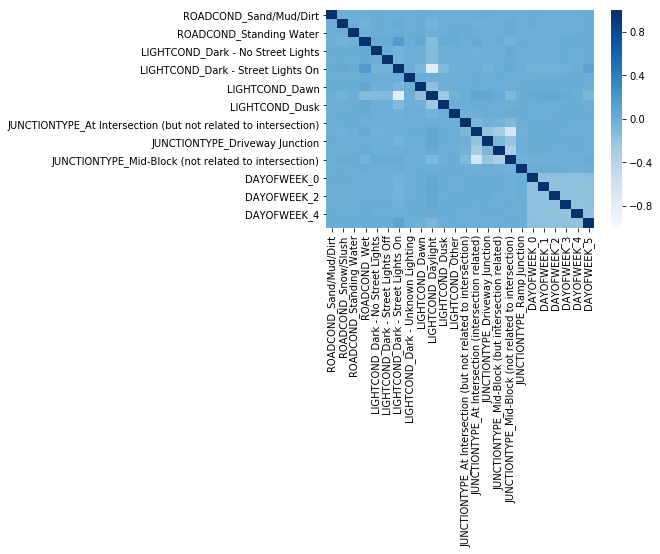

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
importance = model.feature_importances_

less_imp = pd.DataFrame(columns=["Feature", "Importance"]) 
for i,v in enumerate(importance):
    less_imp = less_imp.append({"Feature":X_train.columns[i], "Importance":v}, ignore_index=True)
less_imp.sort_values(['Importance'],ascending = True)
X_train.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
X_test.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
y_train.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
y_test.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
corr = X_train.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center= 0, cmap='Blues')

In [27]:
import itertools
for i, j in itertools.combinations(corr.columns, 2):
    if abs(corr.loc[i, j])>0.60:
        print(i,j, corr.loc[i, j])

LIGHTCOND_Dark - Street Lights On LIGHTCOND_Daylight -0.7813312967532563
JUNCTIONTYPE_At Intersection (intersection related) JUNCTIONTYPE_Mid-Block (not related to intersection) -0.6770030126822411


In [55]:
from sklearn.metrics import f1_score, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression

### K Nearest Neighbor(KNN)

In [40]:
print('\nLets build the model with a random number of neighbors at first')
k=20
print('Random number of k =',k)
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
PredKNN = KNN.predict(X_train)
acc_train = metrics.accuracy_score(y_train, KNN.predict(X_train))
acc_test = metrics.accuracy_score(y_test, PredKNN)
print('Accuracy of the training set:', acc_train)
print('Accuracy of the test set:', acc_test)


Lets build the model with a random number of neighbors at first
Random number of k = 20
Accuracy of the training set: 0.5707988920154766
Accuracy of the test set: 0.5686084853814025


### Decision Tree

The maximum score possible is: 0.6089632399193748
              precision    recall  f1-score   support

           1       0.61      0.61      0.61     45685
           2       0.61      0.61      0.61     45291

   micro avg       0.61      0.61      0.61     90976
   macro avg       0.61      0.61      0.61     90976
weighted avg       0.61      0.61      0.61     90976



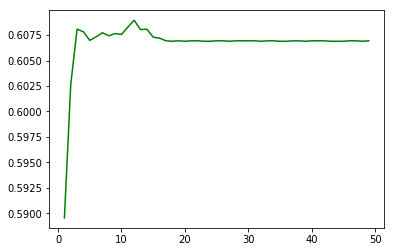

In [36]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

f1score = []
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
for i in range(1,50):
    x = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    y = x.fit(X_train,y_train)
    r = f1_score(y_test,y.predict(X_test),average='weighted')
    f1score.append(r)
plt.plot(range(1,50),f1score, 'g')
print('The maximum score possible is:',max(f1score))
PREDRFC = tree.fit(X_train,y_train).predict(X_train)
print(classification_report(y_train,PREDRFC))

### Support Vector Machine

In [41]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
PredSVM = clf.predict(X_test)
f1_score(y_test,PredSVM,average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6080456925140805

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
PredLr = lr.predict(X_test)
PredLr_proba = lr.predict_proba(X_test)
PREDLR = lr.predict(X_train)
print(classification_report(y_train,PREDLR))

              precision    recall  f1-score   support

           1       0.61      0.60      0.61     45685
           2       0.60      0.61      0.61     45291

   micro avg       0.61      0.61      0.61     90976
   macro avg       0.61      0.61      0.61     90976
weighted avg       0.61      0.61      0.61     90976



### Random Forest Classifier

In [44]:
RFC = RandomForestClassifier(random_state = 42).fit(X_train,y_train)
PREDRFC = cross_val_predict(RFC, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, PREDRFC)
print("Model: Random Forest")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,PREDRFC))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model: Random Forest
Accuracy: 60.56%
Report:
              precision    recall  f1-score   support

           1       0.61      0.61      0.61     45685
           2       0.60      0.60      0.60     45291

   micro avg       0.61      0.61      0.61     90976
   macro avg       0.61      0.61      0.61     90976
weighted avg       0.61      0.61      0.61     90976



## Model Testing using Test set

In [42]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [45]:
PredKNN = KNN.predict(X_test)
Predtree = tree.predict(X_test)
PredSVM = clf.predict(X_test)
PredLr = lr.predict(X_test)
PredRFC = RFC.predict(X_test)

In [46]:
JKNN = jaccard_similarity_score(y_test, PredKNN)
Jtree = jaccard_similarity_score(y_test, Predtree)
JSVM = jaccard_similarity_score(y_test, PredSVM)
JLr = jaccard_similarity_score(y_test, PredLr)
JRFC = jaccard_similarity_score(y_test, PredRFC)

FKNN = f1_score(y_test, PredKNN, average='weighted')
Ftree = f1_score(y_test, Predtree, average='weighted')
FSVM = f1_score(y_test, PredSVM, average='weighted')
FLr = f1_score(y_test, PredLr, average='weighted')
FRFC = f1_score(y_test, PredRFC, average='weighted')

LLr = log_loss(y_test, lr.predict_proba(X_test))

report = pd.DataFrame({'Algorithm': ['KNN','Decision Tree','SVM','RandomForest','LogisticRegresson'], 'Jaccard':[JKNN , Jtree, JSVM, JRFC, JLr] , 'F1_score':[FKNN , Ftree, FSVM, FRFC, FLr] , 'LogLoss':['NA', 'NA','NA','NA',LLr]})
report

,Algorithm,Jaccard,F1_score,LogLoss
0,KNN,0.568608,0.567949,NA
1,Decision Tree,0.607562,0.607562,NA
2,SVM,0.608046,0.608046,NA
3,RandomForest,0.607870,0.607855,NA
4,LogisticRegresson,0.609365,0.609361,0.657295
